In [1]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
import scipy.spatial.distance as ssd
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [5]:
os.chdir('/Users/crystal.butler/Documents/Code_Projects/MiFace/Python/data/Distance_Output/MiFace_2.1-0003/')
os.getcwd()


'/Users/crystal.butler/Documents/Code_Projects/MiFace/Python/data/Distance_Output/MiFace_2.1-0003'

In [6]:
# Read in all-pairs similarity scores.
pairs_scores = pd.read_csv('Score_Lists/0003.pairs.txt_scores.txt', header=None)
# Read in the list of scored words.
labels = pd.read_csv('Label_Lists/0003.pairs.txt_labels.txt', header=None)

In [7]:
print(type(pairs_scores))
print(type(labels))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [8]:
pairs_scores.head()

,0
0,0.329435
1,0.264609
2,0.253338
3,0.158340
4,0.100460


In [9]:
labels.head()

,0
0,serious
1,emotional
2,apprehensive
3,pensive
4,indifferent


In [10]:
# Transform similarity (proximity) scores to distances.
pairs_distances = 1 - pairs_scores
pairs_distances.head()

,0
0,0.670565
1,0.735391
2,0.746662
3,0.841660
4,0.899540


In [47]:
# print(pairs_distances[0][:])
for distance in pairs_distances:
    if distance < 0:
        print(distance)

In [40]:
# distances_array = np.array(pairs_distances)
distances_array = np.array(pairs_distances[0][:])
# labels_array = np.array(labels)
labels_array = np.array(labels[0][:])
# print(distances_array[59][0])
sizeof_da = distances_array.shape
print(sizeof_da)
print(len(sizeof_da))
sizeof_la = labels_array.shape
print(sizeof_la)
print(len(sizeof_la))

(780,)
1
(40,)
1


In [41]:
distances_matrix = ssd.squareform(distances_array, force='tomatrix')

In [42]:
print(type(distances_array))
print(distances_array.shape)
print(type(labels_array))
print(labels_array.shape)

<class 'numpy.ndarray'>
(780,)
<class 'numpy.ndarray'>
(40,)


In [71]:
lnk = sch.linkage(distances_array, 'average')
print(lnk.shape)
print(len(lnk))
# for distance in lnk[:][2]:
#     if distance < 100:
#         print(distance)
# print(lnk.shape)
# lnk_clipped = np.clip(lnk[:][2], 0, 1)
# print(lnk_clipped)
for i in range(len(lnk)):
    if lnk[i][2] < 0:
        lnk[i][2] = 0

(39, 4)
39


[[2], [8], [0], [4], [1], [9], [9], [0], [3], [6]]
[[ 5.          6.          0.          2.        ]
 [ 2.          7.          0.          2.        ]
 [ 0.          4.          1.          2.        ]
 [ 1.         10.          1.          3.        ]
 [ 3.          8.          1.          2.        ]
 [11.         12.          1.5         4.        ]
 [ 9.         14.          2.5         3.        ]
 [15.         16.          3.58333333  7.        ]
 [13.         17.          6.38095238 10.        ]]


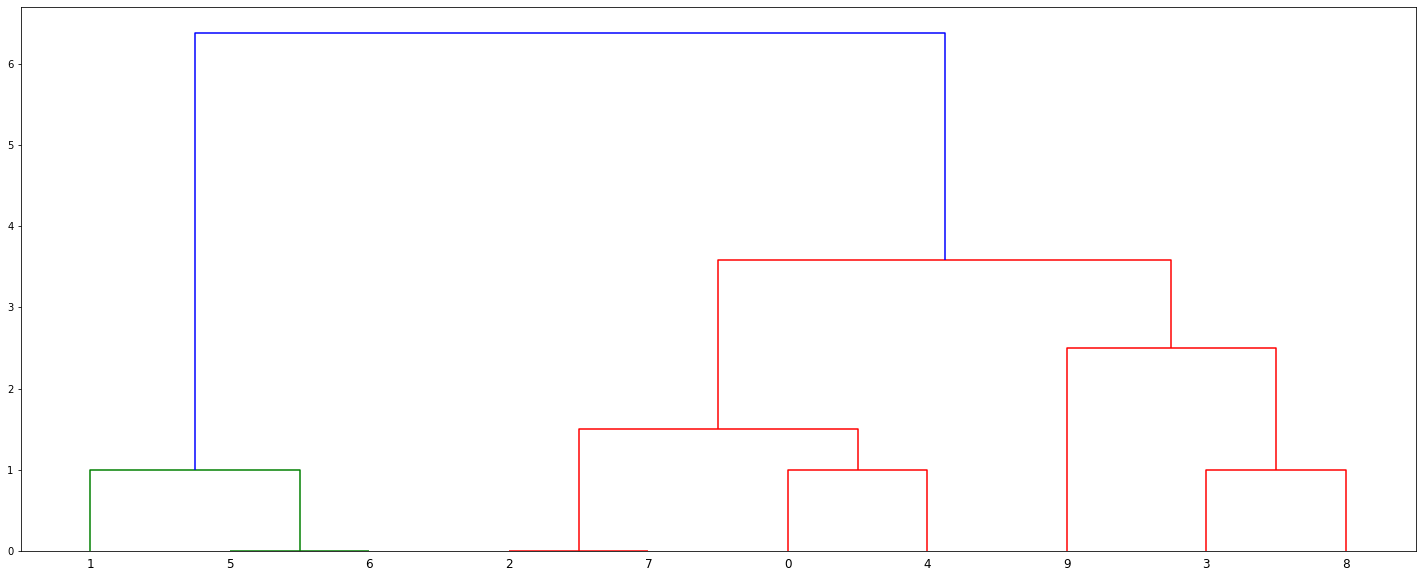

In [72]:
X = [[i] for i in [2, 8, 0, 4, 1, 9, 9, 0, 3, 6]]
print(X)
Z = sch.linkage(X, 'average')
print(Z)
fig = plt.figure(figsize=(25, 10))
dn = sch.dendrogram(Z)
plt.show()

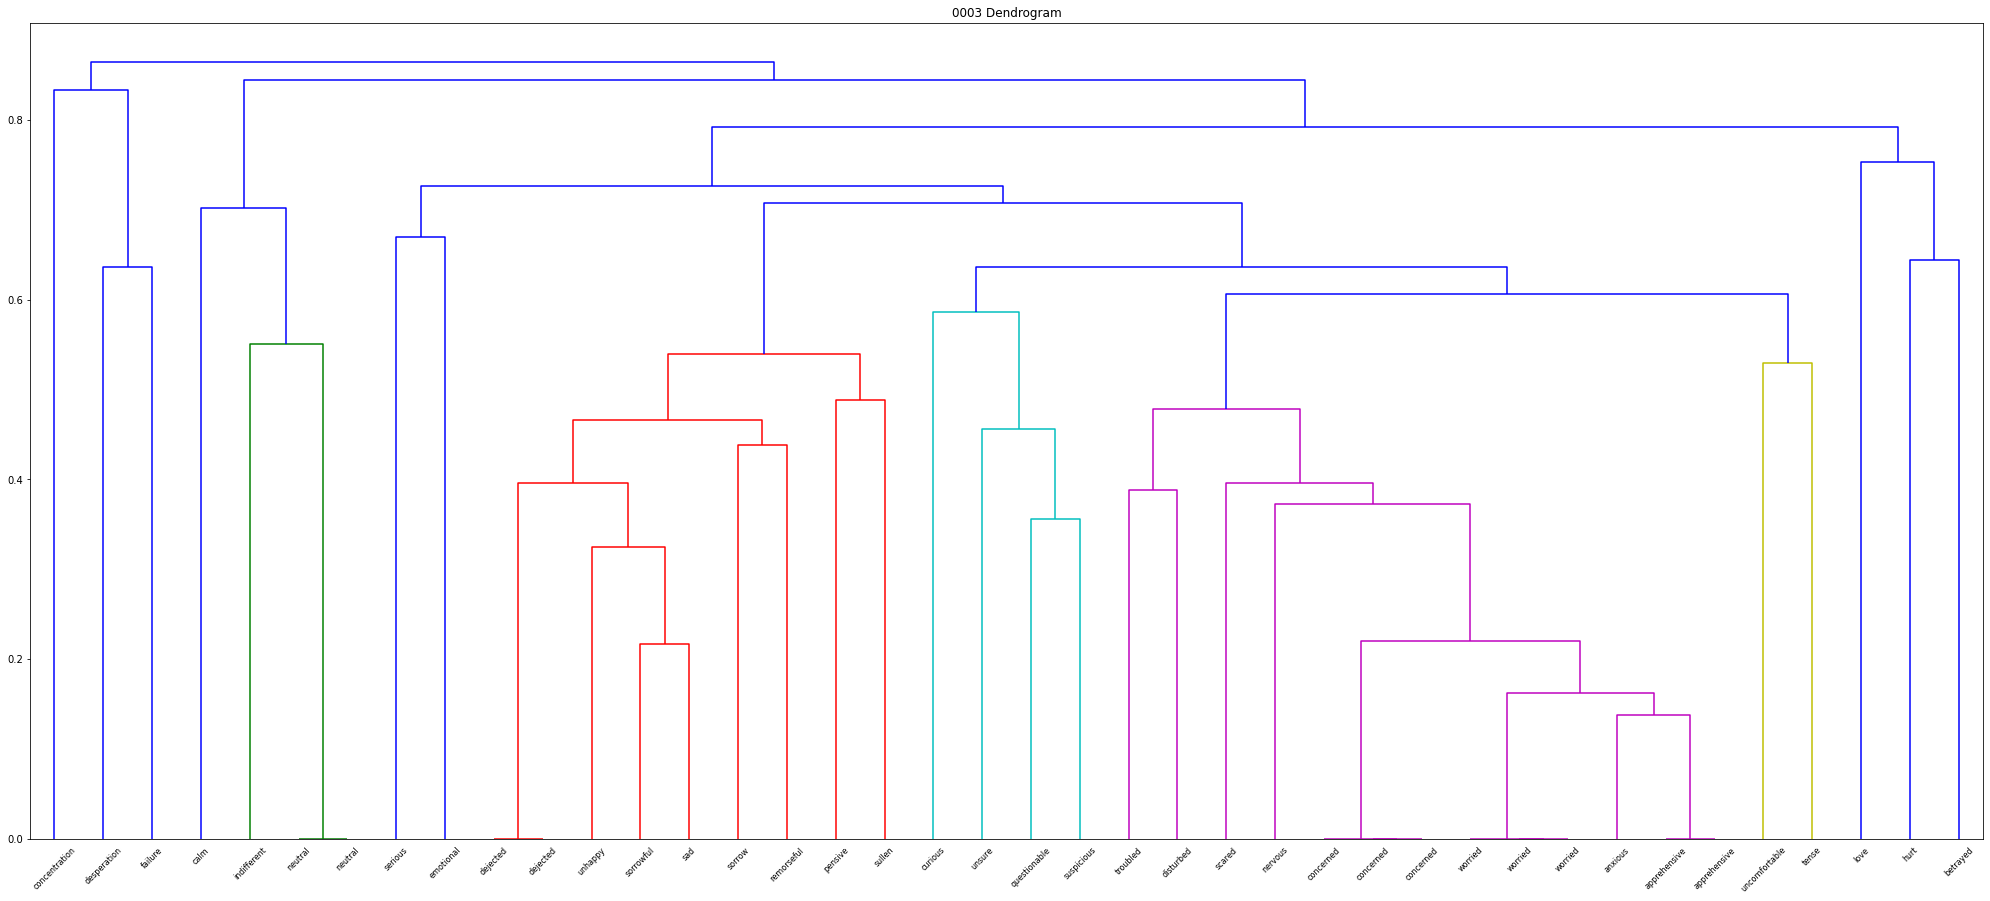

In [74]:
plt.figure(figsize=(35, 15))
plt.title("0003 Dendrogram")
dend = sch.dendrogram(lnk, labels=labels_array)
plt.show()